# Outline
1. [Frame the probelm and look at the big picture ](#1)
2. [Get the Data](#2)
3. [Explore the data to gain insights](#3)
4. [Prepare the data to better expose the underlying patterns to Machine Learning algorithms](#4)
5. [Explore many different models and short-list the best ones](#5)
6. [Fine-tune your models and combine them into a great solution](#6)
7. [Present your solution](#7)
8. [Launch, monitor, and maintain your system](#8)


<a name="1"></a>
# 1. Frame the problem and look at the big picture

In [45]:
# To train Neural Networks.
import tensorflow as tf
from tensorflow import keras

# To Split the data.
from sklearn.model_selection import StratifiedShuffleSplit

# To compute data.
import numpy as np

# To plot data.
import matplotlib.pyplot as plt

<a name='2'></a>
# 2. Get the Data

In [32]:
fashion_mnist = keras.datasets.fashion_mnist

<a name='3'></a>
# 3. Explore the Data to get insights

<a name='4'></a>
# 4. Prepare the Data

In [ ]:
# Split the dataset into two sets.
(X, y), (X_test, y_test) = fashion_mnist.load_data()

In [34]:

# Split the dataset (X, y) into two sets: A training and a validation set (X_val, y_val).
split = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=51)
for train_index, test_index in split.split(X, y):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

In [35]:
print('Shape of the traning features (X_train): ', X_train.shape)
print('Shape of the training targets (y_train): ', y_train.shape, '\n')

print('Shape of the validation features (X_val): ', X_val.shape)
print('Shape of the validation targets (y_val): ', y_val.shape, '\n')

print('Shape of the test featrues (X_test): ', X_test.shape)
print('Shape of the target features (y_test): ', y_test.shape)

Shape of the traning features (X_train):  (50000, 28, 28)
Shape of the training targets (y_train):  (50000,) 

Shape of the validation features (X_val):  (10000, 28, 28)
Shape of the validation targets (y_val):  (10000,) 

Shape of the test featrues (X_test):  (10000, 28, 28)
Shape of the target features (y_test):  (10000,)


In [36]:
# Scale down the features of each dataset.
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

In [37]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [41]:
y_train[0]

5

In [42]:
class_names[y_train[0]]

'Sandal'

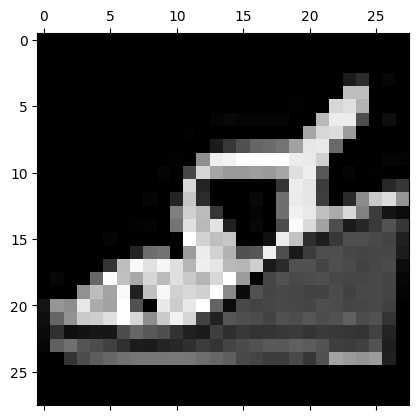

In [46]:
plt.matshow(X_train[0], cmap='gray')

In [48]:
tf.random.set_seed(42)
np.random.seed(42)

# Build a Neural Network Model.
from tensorflow.keras.layers import Flatten, Dense
model = keras.models.Sequential(
    [
        Flatten(input_shape=[28, 28]),
        Dense(300, activation="relu"),
        Dense(100, activation="relu"),
        Dense(10, activation="softmax")
    ]
)

In [49]:
# compile the Model.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [50]:
# Train the Model.
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4207 - accuracy: 0.5755 - val_loss: 0.9841 - val_accuracy: 0.6916
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8709 - accuracy: 0.7190 - val_loss: 0.7716 - val_accuracy: 0.7516
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7344 - accuracy: 0.7600 - val_loss: 0.6811 - val_accuracy: 0.7812
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6642 - accuracy: 0.7821 - val_loss: 0.6276 - val_accuracy: 0.7964
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6184 - accuracy: 0.7972 - val_loss: 0.5891 - val_accuracy: 0.8102
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5854 - accuracy: 0.8082 - val_loss: 0.5628 - val_accuracy: 0.8204
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5602 - accuracy: 0.8159 - val_loss: 0.5384 - val_ac

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# Evaluate the model on the test set.
eval = model.evaluate(X_test, y_test, batch_size=2)

5000/5000 [==============================] - 26s 5ms/step - loss: 0.5308 - accuracy: 0.8183
